### -------Import the libraries--------

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

### -------Explore the data---------

In [11]:
def show_img(i, data):
    id = data.loc[i,'id']
    img_path = "../input/dog-breed-identification/train/" + id + ".jpg"
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    breed = data.loc[i,'breed']
    plt.imshow(img)
    plt.title(breed)
    
    

In [12]:
data = pd.read_csv("../input/dog-breed-identification/labels.csv")

In [13]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='breed', ylabel='count'>

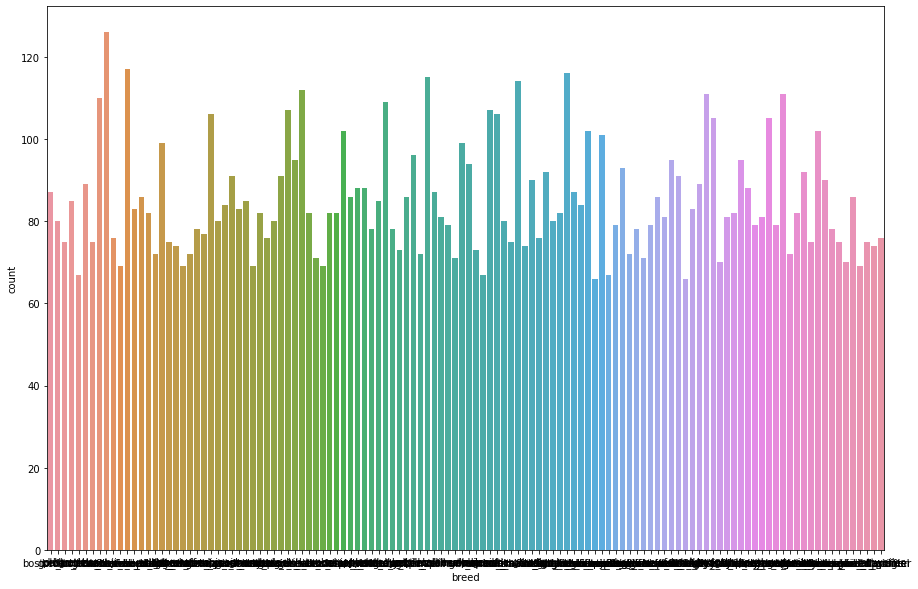

In [14]:
plt.figure(figsize = (15,10))
sns.countplot(data.breed)

In [15]:
classes = data.groupby(data.breed).count()

In [16]:
classes.head(6)

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
appenzeller,78


In [17]:
len(classes)

120

In [18]:
print('training and test images  number : ',len(os.listdir('../input/dog-breed-identification/train')),
     len(os.listdir('../input/dog-breed-identification/test'))
     )

training and test images  number :  10222 10357


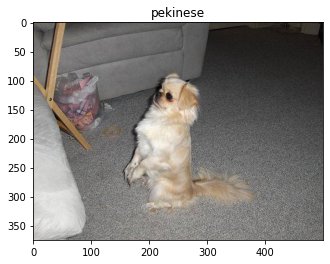

In [19]:
show_img(2, data)

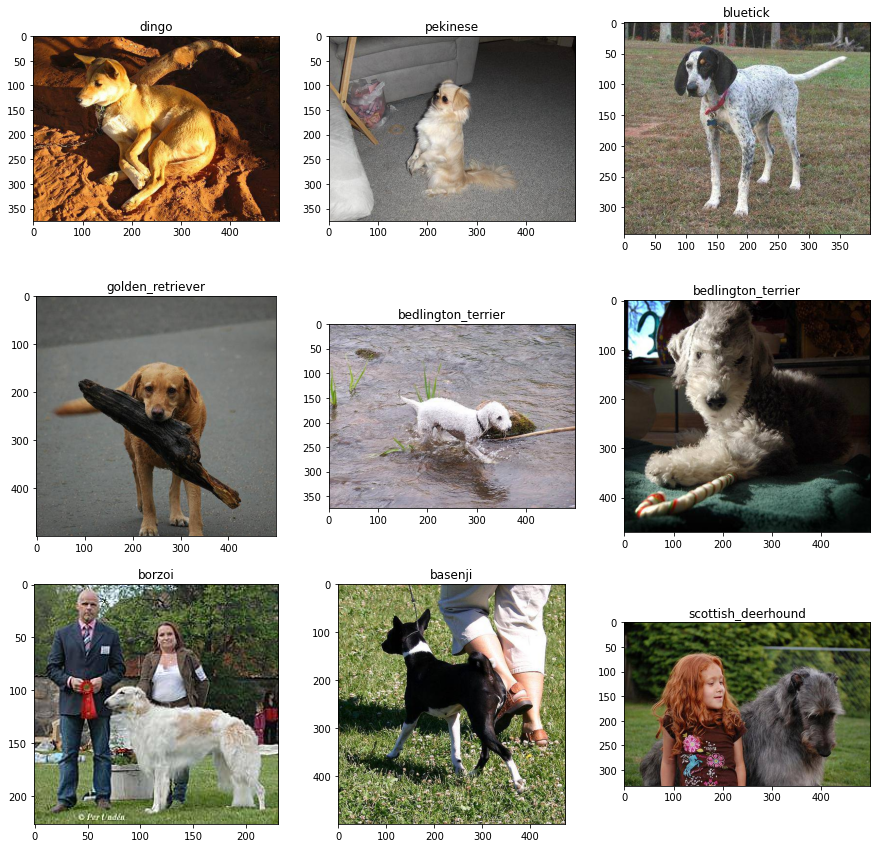

In [20]:
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    show_img(i, data)
    
plt.show()

### --------Preprocess the data--------

In [41]:
def prepare_data(data):
    X = np.empty((data.shape[0], 64, 64, 3))
    for i in range(data.shape[0]):
        id = data.loc[i,'id']
        img_path = "../input/dog-breed-identification/train/" + id + ".jpg"
        img = cv2.imread(img_path)
        #Grayscale conversion
        #Normalization
        img =  (img - np.min(img)) / (np.max(img) - np.min(img))
        # Resizing
        img = cv2.resize(img,dsize=(64,64))
        X[i, :, :] = img
    return X
           

In [42]:
X = prepare_data(data)

In [43]:
y = pd.get_dummies(data['breed'])

In [44]:
y.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [46]:
X_train.shape

(8177, 64, 64, 3)

### --------build the model--------

In [48]:

pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(64,64,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [53]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(120, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
his=model.fit(X_train,y_train,batch_size=32,validation_data=(X_validation,y_validation),epochs=30)

Epoch 1/30
256/256 [==============================] - 138s 484ms/step - loss: 4.7218 - accuracy: 0.0248 - val_loss: 4.5293 - val_accuracy: 0.0465
Epoch 2/30
256/256 [==============================] - 116s 455ms/step - loss: 4.1433 - accuracy: 0.0923 - val_loss: 4.2180 - val_accuracy: 0.0856
Epoch 3/30
256/256 [==============================] - 116s 451ms/step - loss: 3.6546 - accuracy: 0.1589 - val_loss: 4.0370 - val_accuracy: 0.1046
Epoch 4/30
256/256 [==============================] - 117s 457ms/step - loss: 3.3047 - accuracy: 0.2130 - val_loss: 4.0113 - val_accuracy: 0.1076
Epoch 5/30
256/256 [==============================] - 116s 454ms/step - loss: 2.9864 - accuracy: 0.2732 - val_loss: 4.0860 - val_accuracy: 0.1159
Epoch 6/30
256/256 [==============================] - 115s 450ms/step - loss: 2.7075 - accuracy: 0.3304 - val_loss: 4.1249 - val_accuracy: 0.1237
Epoch 7/30
256/256 [==============================] - 116s 454ms/step - loss: 2.4291 - accuracy: 0.3906 - val_loss: 4.2506 -

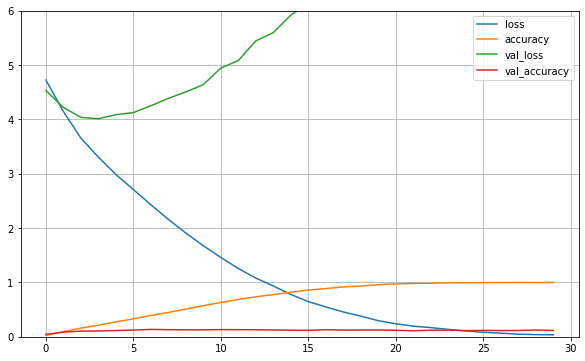

In [59]:
pd.DataFrame(his.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 6)
plt.show()